# Autoencoders 2: Convolutional Autoencoders

When using matrices (or tensors) as inputs, we can change our fully connected architecture and replace it by convolutional layers. In fact, these convolutional architectures have reported many beneficts in practice as they are better capable of extracting increasingly meaninful features as the depth of the network increases.

As displayed in the following figure, convolutional autoecoders have a very similar structuro to fully-connected autoencoders. Nevertheless there are minor important details to considerate:

 <b>1. Encoder: </b> To encode the input image, convolutional and pooling layers are used to simultaneously extract relevant features and reduce the dimensionality of the data. <br>
 <b>2. Decoder: </b> In order to obtain back the original size the image, we need to use deconvolution and upsampling layers, which perform the oposite of the convolution and pooling operators.<br>
 <b>3. Bottleneck: </b> As the code we are interested in is defined as a vector, it is common to flatten the feature matrices obtained from the convolutional layers and to use a fully-connected layer to reduce the networ's latent representation to the desired code dimensionality.

<img src="img/conv_autoencoder.png" alt="Drawing" style="width: 50%;"/>

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
    This notebook illustrates the tutorial blog post: <b><a href="http://www.angelvillarcorrales.com/templates/tutorials/autoencoders/ConvolutionalAutoencoders.php">Convolutional Autoencoders</a></b><br>
     Therefore, theoretical contents might not completely be explained in detail. Please refer to the post for more in-depth explanations.  
</div> 

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import lib.models as models
import lib.visualizations as visualizations
import lib.data_handler as data_handler
import lib.utils as utils

Using TensorFlow backend.


In [3]:
import keras.backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# loading MNIST dataset
train_set, test_set = data_handler.load_mnist_dataset()

## Basic Convolutional Autoencoder

First, we investigate the effect that a simple convolutional autoencoder has when reconstructing images from the MNIST dataset. For this purpose, we create a simple convolutional model and test it on the MNIST dataset.

In [6]:
conv_autoencoder, _ = models.basic_conv_autoencoder(bottleneck_dim=32, loss="mse")
conv_autoencoder.summary()

Model: "conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               627300    
_________________________________________________________________
bottleneck (Dense)           (None, 32)                3232      
_________________________________________________________________
dense_2 (Dense)              (None, 100)          

In [7]:
# reshaping train and test images to be fed into a conv network
train_data, test_data = data_handler.prepare_mnist_for_conv(train_set[0], test_set[0])

In [8]:
training_log = conv_autoencoder.fit(train_data, train_data,
                                       epochs=20, batch_size=1024,
                                       shuffle=True, validation_data=(test_data,test_data))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0525 - val_loss: 0.0318
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0243 - val_loss: 0.0186
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0167 - val_loss: 0.0145
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0138 - val_loss: 0.0127
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0122 - val_loss: 0.0114
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0111 - val_loss: 0.0104
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0104 - val_loss: 0.0099
Epoch 8/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0099 - val_loss: 0.0096
Epoch 9/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0095 - val_loss: 0.0092
Epoch

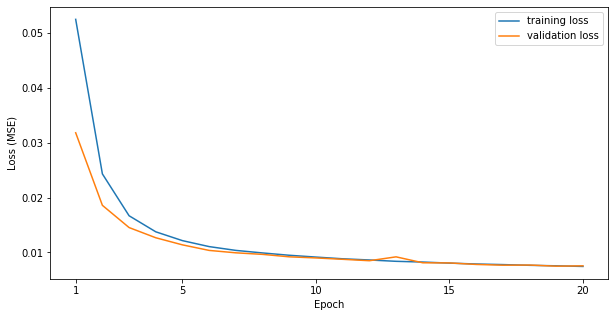

In [9]:
training_loss = training_log.history["loss"]
validation_loss = training_log.history["val_loss"]

plt.figure(figsize=(10,5))
plt.plot(training_loss, label="training loss")
plt.plot(validation_loss, label="validation loss")
plt.legend(loc="best")
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.xticks([0,4,9,14,19],[1,5,10,15,20])
plt.show()

In [10]:
# encoding and decoding the MNIST test set
decoded_imgs = conv_autoencoder.predict(test_data)

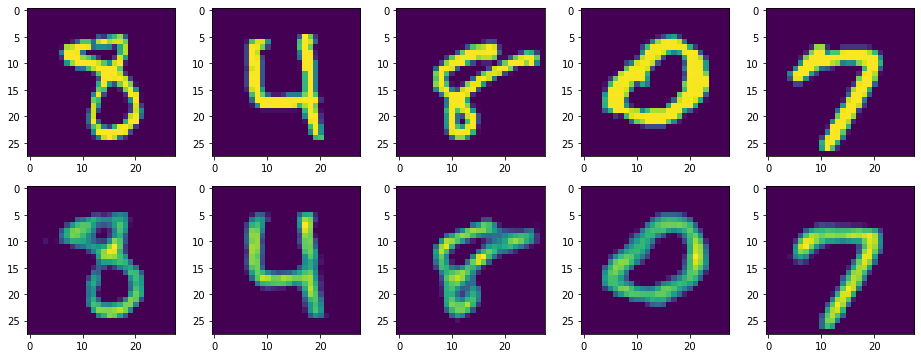

In [11]:
# displaying some of the images before encodeing and after decoding
visualizations.display_original_and_decoded_imgs(img_original=test_data[:,:,:,0],
                                                 img_decoded=decoded_imgs[:,:,:,0], n_images=5)

The results displayed in the previous cell are actuvally quite impresive. We can see how using just a 32-dimensional code, the reconstructed images are almost identical to the original ones, which means that the neural network has learned a function close the identity. 

Nevertheless, as already discussed, when using autoencoders as dimensionality reduction methods we are not so interested in the reconstructed output, but on the low-dimensional code obtained at the bottleneck layer.

### Visualizing the Latent Space

Now we change the dimensionality of the latent space to just two, that way we can see how the different images are projected onto this latent manifold.

In [12]:
conv_autoencoder_d_2, conv_encoder_d_2 = models.basic_conv_autoencoder(bottleneck_dim=2, loss="mse")
conv_autoencoder_d_2.summary()                    

Model: "conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               627300    
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 202       
_________________________________________________________________
dense_5 (Dense)              (None, 100)          

In [13]:
training_log = conv_autoencoder_d_2.fit(train_data, train_data,
                                       epochs=20, batch_size=1024,
                                       shuffle=True, validation_data=(test_data,test_data))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0646 - val_loss: 0.0576
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0565 - val_loss: 0.0554
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0547 - val_loss: 0.0537
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0527 - val_loss: 0.0516
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0508 - val_loss: 0.0499
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0496 - val_loss: 0.0489
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0485 - val_loss: 0.0479
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0476 - val_loss: 0.0472
Epoch 9/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0471 - val_loss: 0.0466
Epoch

In [14]:
decoded_imgs = conv_autoencoder_d_2.predict(test_data)

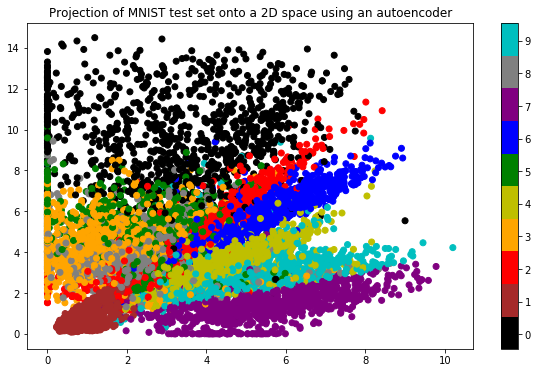

In [15]:
autoencoder_projections = conv_encoder_d_2.predict(test_data)
visualizations.plot_latent(autoencoder_projections, label=test_set[1], dim=2, 
                           title="Projection of MNIST test set onto a 2D space using an autoencoder")

We can see how most of the classes (all besides the tutokes (9,4) and (3,5,8)) are well separable in this latent low-dimensional space. In fact the results are significalty better
than in the PCA and Fully-connected autoencoder case, displayed in the next cell. 

This improvement can be possibly explained due the fact that the encoder projects onto the latent space relevant features extracted from the images, rather that the images
themselves. During the feature extraction process, the convolutional layer learns filters that are matched to extract relevant feautres from the images, already removing most
of the noise and not characteristic properties of the images.

<div>
    <img src="img/pca_projections.png" alt="Drawing" style="width: 45%;"/>
    <img src="img/dense_projections.png" alt="Drawing" style="width: 45%;"/>
</div>

## Experiments on CIFAR-10

We have seen how convolutional autoencoders perform in the MNIST dataset. Nevertheless, the latter can be considered a very simple dataset as the images contained are 
indeed far from being  real images. Therefore, in this section we investigate the effects of autoencoder models on the CIFAR-10 dataset.

First, we train the autoencoder model to have a latent dimensionality of 128, which is a dimensionality reduction by (approximatly) a factor of 25.

In [16]:
# downloading and loading the data and labels
cifar_train, cifar_test = data_handler.load_ciphar_data()

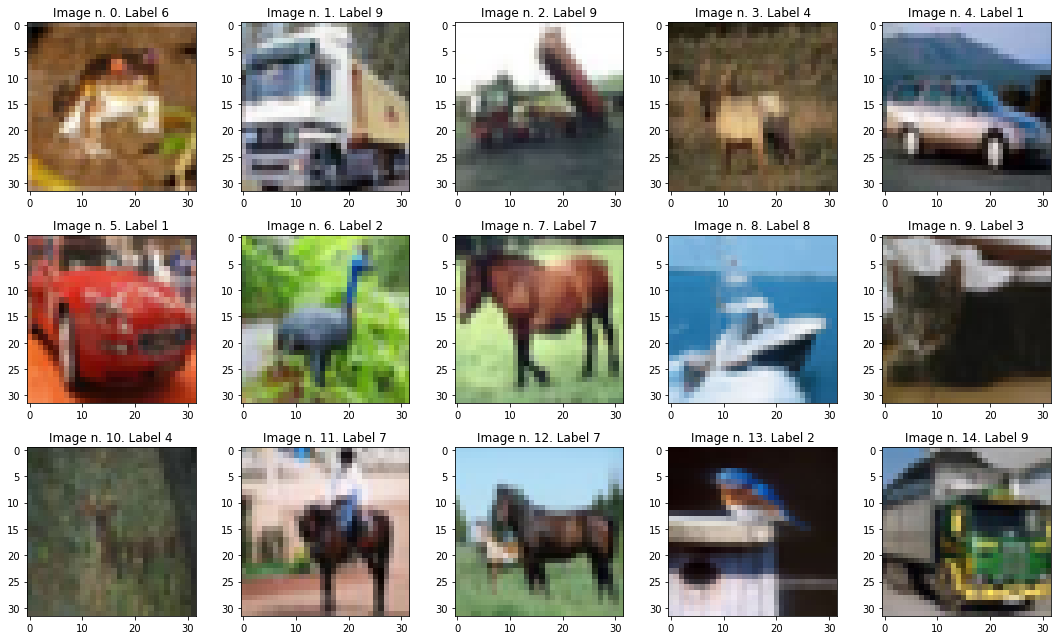

In [17]:
# visualizing some of the images in the dataset
visualizations.display_dataset_subset(image_set=cifar_train, num_images=15, grid_shape=(3,5), random=False)

In [18]:
# setting up a more complex model, very similar to the one in the figure at the beginning of the notebook
cifar_autoencoder, _ = models.ciphar_conv_autoencoder(bottleneck_dim=128, loss="mse")
cifar_autoencoder.summary()

Model: "conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)         

In [19]:
training_log = cifar_autoencoder.fit(cifar_train[0], cifar_train[0],
                                     epochs=20, batch_size=256,
                                     shuffle=True, validation_data=(cifar_test[0], cifar_test[0]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 129us/step - loss: 2508.9524 - val_loss: 1533.5489
Epoch 2/20
50000/50000 [==============================] - 6s 113us/step - loss: 1398.8089 - val_loss: 1147.6888
Epoch 3/20
50000/50000 [==============================] - 5s 98us/step - loss: 1089.4653 - val_loss: 1070.1957
Epoch 4/20
50000/50000 [==============================] - 6s 113us/step - loss: 990.7457 - val_loss: 951.3025
Epoch 5/20
50000/50000 [==============================] - 6s 129us/step - loss: 934.3906 - val_loss: 882.6765
Epoch 6/20
50000/50000 [==============================] - 6s 112us/step - loss: 880.4584 - val_loss: 867.1787
Epoch 7/20
50000/50000 [==============================] - 6s 118us/step - loss: 849.5611 - val_loss: 820.8844
Epoch 8/20
50000/50000 [==============================] - 6s 115us/step - loss: 804.9759 - val_loss: 872.5874
Epoch 9/20
50000/50000 [==============================] - 6s 119u

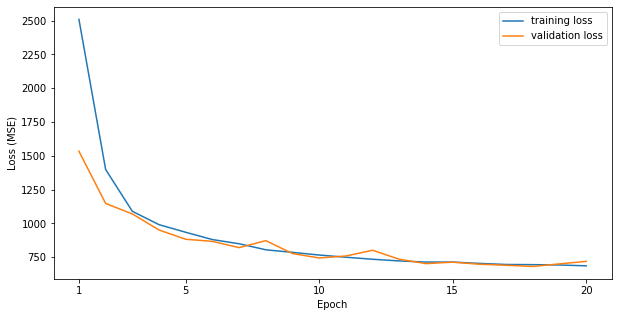

In [20]:
training_loss = training_log.history["loss"]
validation_loss = training_log.history["val_loss"]

plt.figure(figsize=(10,5))
plt.plot(training_loss, label="training loss")
plt.plot(validation_loss, label="validation loss")
plt.legend(loc="best")
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.xticks([0,4,9,14,19],[1,5,10,15,20])
plt.show()

In [21]:
# encoding and decoding the MNIST test set
decoded_imgs = cifar_autoencoder.predict(cifar_test[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


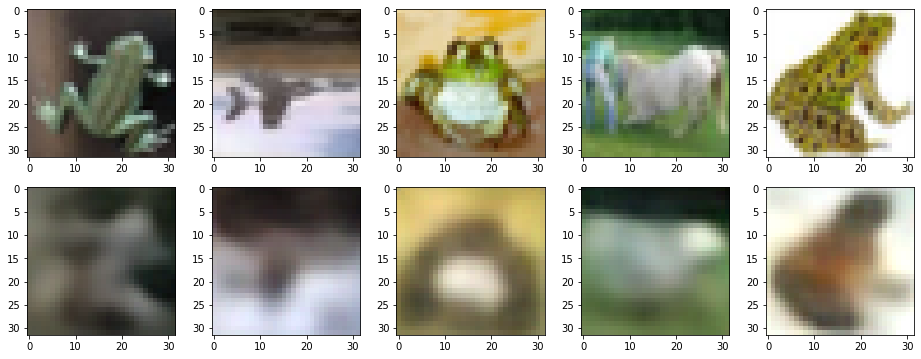

In [22]:
# displaying some of the images before encodeing and after decoding
visualizations.display_original_and_decoded_imgs(img_original=cifar_test[0],
                                                 img_decoded=np.round(decoded_imgs).astype(int), n_images=5)

We can see how, despite the fact that colors and some edges are preserved, most of the high frequency information is lost, hence the image looking blurry.

This is actually a common effect in autoencoders. Some of the information lost on the bottleneck is necessary to later reconstruct the sharp parts of image, and therefore is the high frequency information lost. 

### Visualizing the Latent Space Representation

In [23]:
# setting up a more complex model, very similar to the one in the figure at the beginning of the notebook
cifar_autoencoder_2_d, cifar_encoder_2_d = models.ciphar_conv_autoencoder(bottleneck_dim=2, loss="mse")
cifar_autoencoder_2_d.summary()

Model: "conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)         

In [24]:
training_log = cifar_autoencoder_2_d.fit(cifar_train[0], cifar_train[0],
                                     epochs=20, batch_size=256,
                                     shuffle=True, validation_data=(cifar_test[0], cifar_test[0]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 135us/step - loss: 3199.6788 - val_loss: 2480.5889
Epoch 2/20
50000/50000 [==============================] - 6s 121us/step - loss: 2474.5701 - val_loss: 2494.9452
Epoch 3/20
50000/50000 [==============================] - 6s 118us/step - loss: 2457.4414 - val_loss: 2530.0987
Epoch 4/20
50000/50000 [==============================] - 6s 119us/step - loss: 2447.6467 - val_loss: 2447.3431
Epoch 5/20
50000/50000 [==============================] - 5s 103us/step - loss: 2437.2402 - val_loss: 2421.8927
Epoch 6/20
50000/50000 [==============================] - 6s 113us/step - loss: 2429.3109 - val_loss: 2419.4255
Epoch 7/20
50000/50000 [==============================] - 6s 116us/step - loss: 2425.3101 - val_loss: 2442.2433
Epoch 8/20
50000/50000 [==============================] - 6s 114us/step - loss: 2416.9207 - val_loss: 2416.6058
Epoch 9/20
50000/50000 [==============================

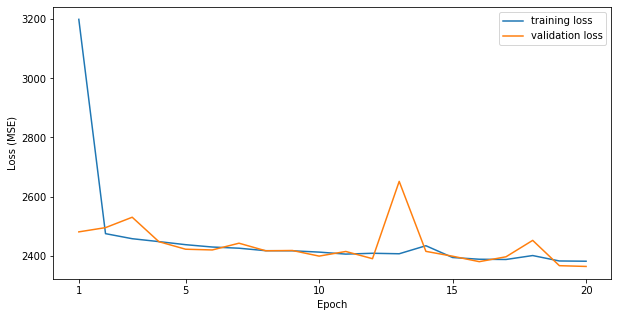

In [25]:
training_loss = training_log.history["loss"]
validation_loss = training_log.history["val_loss"]

plt.figure(figsize=(10,5))
plt.plot(training_loss, label="training loss")
plt.plot(validation_loss, label="validation loss")
plt.legend(loc="best")
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.xticks([0,4,9,14,19],[1,5,10,15,20])
plt.show()

In [26]:
decoded_imgs = cifar_autoencoder_2_d.predict(cifar_test[0])

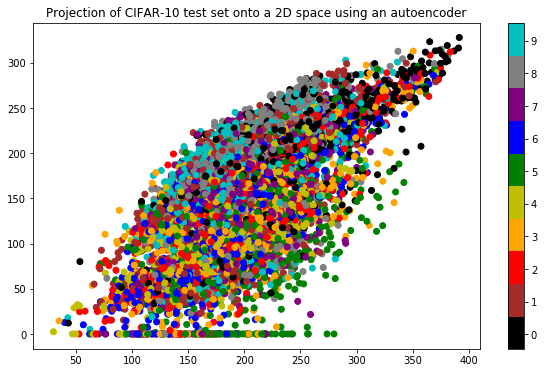

In [27]:
autoencoder_projections = cifar_encoder_2_d.predict(cifar_test[0])
visualizations.plot_latent(autoencoder_projections, label=cifar_test[1][:,0], dim=2, 
                           title="Projection of CIFAR-10 test set onto a 2D space using an autoencoder")

In [28]:
pca_projections = utils.computed_PCA_projection(train_data=cifar_train[0], test_data=cifar_test[0], dim=2)

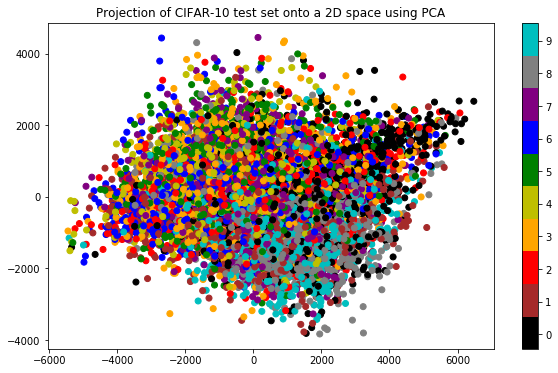

In [29]:
visualizations.plot_latent(pca_projections, label=cifar_test[1][:,0], dim=2, title="Projection of CIFAR-10 test set onto a 2D space using PCA")

We can see from the two previous plots that, unfortunately, the 2-dimensional latent representation learned by the autoencoder does not really help us further understand the distribution of the data. This is, nevertheless, a comprehensible fact as it is not easy to represent the complexity of the CIFAR-10 images (32 x 32 images with three color channels) using simply a 2-dimensional vector.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
    This notebook was created by <b>Angel Villar-Corrales</b>
</div> 